In [1]:
from skimage import data, img_as_float, img_as_ubyte
from skimage import io, img_as_ubyte, exposure, util, morphology
from skimage.color import rgb2gray, rgb2hsv
import matplotlib.pyplot as plt
import cv2
import numpy as np
#from skimage import filters
import random
#from skimage import segmentation

In [2]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [3]:
pola_monet = {0.01: 22969, 0.02: 29994, 0.05: 35829, 0.1: 25976, 0.2: 33252, 0.5: 38842, 1.0: 49378, 2.0: 45367, 5.0: 54034}

In [4]:
#Segmentacja i scalanie obiektów 
def segmentuj(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):
            if img[i][j] != 255.0:
                if img[i][j] == 0.0:
                    img[i][j] = random.randint(1, 250)
                    if img[i-1][j-1] != 0.0 and img[i-1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i-1][j] != 0.0 and img[i-1][j] != 255.0:
                        img[i][j] = img[i-1][j]
                    elif img[i-1][j+1] != 0.0 and img[i-1][j+1] != 255.0:
                        img[i][j] = img[i-1][j+1]
                    elif img[i][j-1] != 0.0 and img[i][j-1] != 255.0:
                        img[i][j] = img[i][j-1]
                    elif img[i][j+1] != 0.0 and img[i][j+1] != 255.0:
                        img[i][j] = img[i][j+1]
                    elif img[i+1][j-1] != 0.0 and img[i+1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i+1][j] != 0.0 and img[i+1][j] != 255.0:
                        img[i][j] = img[i+1][j]
                    elif img[i+1][j+1] != 0.0 and img[i+1][j+1] != 255.0:
                        img[i][j] = img[i+1][j+1]
                    else:
                        continue
                    #scalanie obiektów
                if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255.0:
                    img[i][j] = img[i-1][j-1]
                    
                elif img[i][j] != img[i-1][j] and img[i-1][j] != 255.0:
                    img[i][j] = img[i-1][j]
                    
                elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255.0:
                    img[i-1][j+1] = img[i][j]
                    
                elif img[i][j] != img[i][j-1] and img[i][j-1] != 255.0:
                    img[i][j-1] = img[i][j]
                    
                elif img[i][j] != img[i][j+1] and img[i][j+1] != 255.0:
                    img[i][j+1] = img[i][j]
                    
                elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255.0:
                    img[i][j] = img[i+1][j-1]
                    
                elif img[i][j] != img[i+1][j] and img[i+1][j] != 255.0:
                    img[i][j] = img[i+1][j]
                elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255.0:
                    img[i][j] = img[i+1][j+1]
                else:
                    continue
    return img


def scal(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):   
            if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255:
                img[i][j] = img[i-1][j-1]

            elif img[i][j] != img[i-1][j] and img[i-1][j] != 255:
                img[i][j] = img[i-1][j]

            elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255:
                img[i-1][j+1] = img[i][j]

            elif img[i][j] != img[i][j-1] and img[i][j-1] != 255:
                img[i][j-1] = img[i][j]

            elif img[i][j] != img[i][j+1] and img[i][j+1] != 255:
                img[i][j+1] = img[i][j]

            elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255:
                img[i][j] = img[i+1][j-1]

            elif img[i][j] != img[i+1][j] and img[i+1][j] != 255:
                img[i][j] = img[i+1][j]
            elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255:
                img[i][j] = img[i+1][j+1]
            else:
                continue
                
    return img

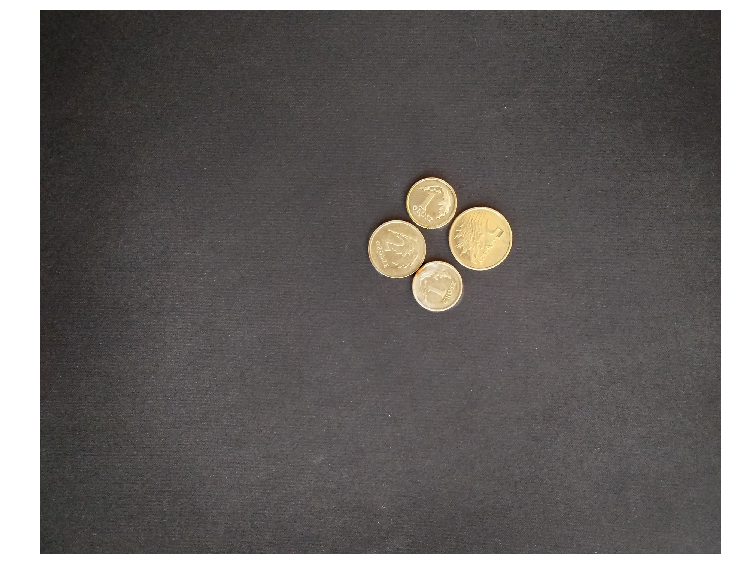

In [5]:
im = io.imread('przeskalowane/0.09v2.jpg')

plt.figure(figsize=(15,10))
plt.imshow(im, cmap="gray")
plt.axis('off')
plt.show()

In [6]:
def licz_tlo(img, tlo):
    ile_tla = 0
    for i in range(bim.shape[0]):
        for j in range(bim.shape[1]):
            if bim[i][j] == tlo:
                ile_tla += 1
    return ile_tla

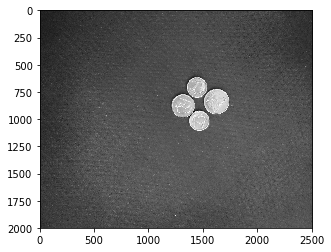

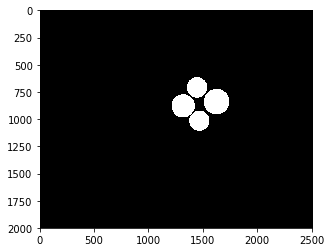

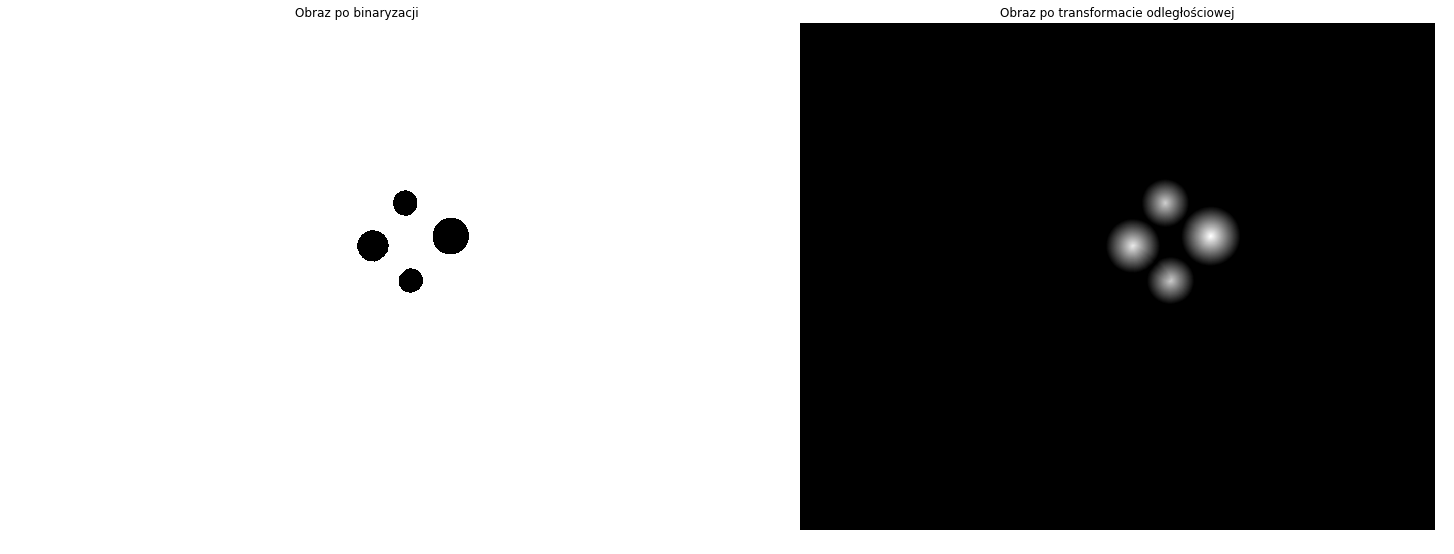

In [12]:
th = 150
img = img_as_ubyte(rgb2gray(im))
plt.imshow(img, cmap="gray")
plt.axis('on')
plt.show()

th, bimm = cv2.threshold(img, thresh=th, maxval=255, type=cv2.THRESH_OTSU)
mbim = cv2.medianBlur(bimm,  11)
plt.imshow(mbim, cmap="gray")
plt.axis('on')
plt.show()


dt = cv2.distanceTransform(mbim, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)

th = 45
th, bim = cv2.threshold(dt, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)
show2imgs(bim, dt, title1='Obraz po binaryzacji', title2='Obraz po transformacie odległościowej', size=(25,25))

#kernel = np.ones((3,3),np.uint8)
#erodeBin = cv2.erode(bim, kernel=kernel, iterations=25)
#
#plt.imshow(erodeBin, cmap="hot")
#plt.axis('on')
#plt.show()

In [13]:
#Liczenie ilości obiektów na obrazie
def licz_obiekty(img):
    ile_obiektow = 0
    obiekty = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] != 255:
                obiekty.append(img[i][j])
    ile_obiektow = len(list(set(obiekty)))# zlicza niepowtarzające się elementy listy
    return ile_obiektow

15
0
Wykonało się!
15
Wykonało się!
6
Wykonało się!


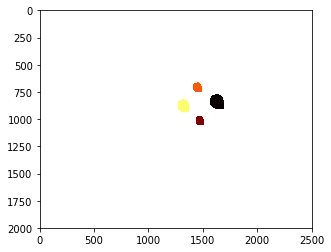

Obiektów jest:	 4


In [14]:
nimg = segmentuj(bim)
tmp = 0
ile = licz_obiekty(nimg)
print(ile)
while tmp != ile:
    print(tmp)
    nimg = scal(nimg)
    nimg = scal(nimg)
    tmp = ile
    ile = licz_obiekty(nimg)
    print("Wykonało się!")

plt.imshow(nimg, cmap="hot")
plt.axis('on')
plt.show()

ile_ob = ile

print("Obiektów jest:\t", ile_ob)

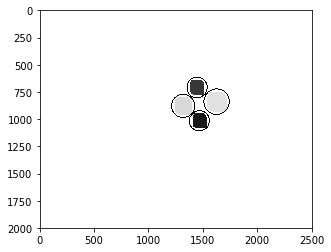

[array([[[1451,  922]],

       [[1450,  923]],

       [[1444,  923]],

       [[1443,  924]],

       [[1438,  924]],

       [[1437,  925]],

       [[1434,  925]],

       [[1433,  926]],

       [[1431,  926]],

       [[1430,  927]],

       [[1428,  927]],

       [[1427,  928]],

       [[1425,  928]],

       [[1424,  929]],

       [[1423,  929]],

       [[1422,  930]],

       [[1421,  930]],

       [[1420,  931]],

       [[1419,  931]],

       [[1418,  932]],

       [[1417,  932]],

       [[1416,  933]],

       [[1415,  933]],

       [[1413,  935]],

       [[1412,  935]],

       [[1406,  941]],

       [[1406,  942]],

       [[1404,  944]],

       [[1404,  945]],

       [[1399,  950]],

       [[1398,  950]],

       [[1389,  959]],

       [[1389,  960]],

       [[1387,  962]],

       [[1387,  963]],

       [[1384,  966]],

       [[1384,  967]],

       [[1380,  971]],

       [[1379,  971]],

       [[1379,  972]],

       [[1376,  975]],

       [[1376, 

In [13]:
#od tego momentu próby zliczenia ich nominałów
#erodeBin = cv2.erode(nimg, kernel=kernel, iterations=48)
mbim = cv2.medianBlur(bimm,  9)
dist =  cv2.distanceTransform(mbim, cv2.DIST_L1 , 5)
im2, contours, hierarchy = cv2.findContours(mbim, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(nimg, contours, -1, (0,0,0), 7)
#show2imgs(mbim, nimg, title1='Obraz po binaryzacji', title2='Obraz po transformacie odległościowej', size=(25,25))

plt.imshow(nimg, cmap="gray")
plt.axis('on')
plt.show()
print(contours)


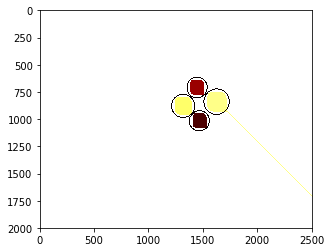

In [19]:
plt.imshow(nimg, cmap="hot")
plt.axis('on')
plt.show()
img = nimg

for i in range(img.shape[0]-4):
    for j in range(img.shape[1]-4):
        if img[i][j] != 255:
            if img[i][j] == 0:
                x = i 
                y = j 
                while img[x][y] != 255 and img[x][y] != 0:
                    if img[x][y] != img[x-1][y-1] and img[x-1][y-1] != 0:
                        img[x-1][y-1] = img[x][y]
                    if img[x][y] != img[x-1][y] and img[x-1][y] != 0:
                        img[x-1][y] = img[x][y] 
                    if img[x][y] != img[x-1][y+1] and img[x-1][y+1] != 0:
                        img[x-1][y+1] = img[x][y]
                        
                    if img[x][y] != img[x][y-1] and img[x][y-1] != 0:
                        img[x][y-1] = img[x][y]
                    if img[x][y] != img[x][y+1] and img[x][y+1] != 0:
                        img[x][y+1] = img[x][y]
                        
                    if img[x][y] != img[x+1][y-1] and img[x+1][y-1] != 0:
                        img[x+1][y-1] = img[x][y]
                    if img[x][y] != img[x+1][y] and img[x+1][y] != 0:
                        img[x+1][y] = img[x][y] 
                    if img[x][y] != img[x+1][y+1] and img[x+1][y+1] != 0:
                        img[x+1][y+1] = img[x][y]
                        
                    x += 1
                    y += 1
            


    

In [ ]:
mbim = cv2.medianBlur(bimm,  9)
dist =  cv2.distanceTransform(mbim, cv2.DIST_L1 , 5)
im2, contours, hierarchy = cv2.findContours(mbim, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(nimg, contours, -1, (0,0,0), 7)

plt.imshow(nimg, cmap="gray")
plt.axis('on')
plt.show()

#nimg = segmentuj(nimg)
tmp = 0
ile = licz_obiekty(nimg)
print(ile)
while tmp != ile:
    print(tmp)
    nimg = scal(nimg)
    nimg = scal(nimg)
    tmp = ile
    ile = licz_obiekty(nimg)
    print("Wykonało się!")

plt.imshow(nimg, cmap="hot")
plt.axis('on')
plt.show()

print("Obiektów jest:\t", ile)

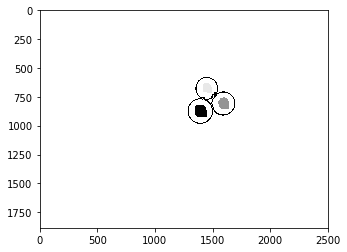

In [140]:
mbim = cv2.medianBlur(bimm,  9)
dist =  cv2.distanceTransform(mbim, cv2.DIST_L1 , 5)
im2, contours, hierarchy = cv2.findContours(mbim, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(nimg, contours, -1, (0,0,0), 7)

plt.imshow(nimg, cmap="gray")
plt.axis('on')
plt.show()


In [92]:
kolory = []
jakie_obiekty = []
for i in range(nimg.shape[0]):
    for j in range(nimg.shape[1]):
        if nimg[i][j] != 0:
            if nimg[i][j] != 255:
                kolory.append(nimg[i][j])
jakie_obiekty = list(set(kolory))
print(jakie_obiekty)

[232.0, 52.0, 181.0, 55.0, 218.0]


In [218]:
pola_nowe = {}
for x in jakie_obiekty:
    ile_pikseli = 0
    for i in range(nimg.shape[0]):
        for j in range(nimg.shape[1]):
            if nimg[i][j] == x:
                ile_pikseli += 1
    pola_nowe[x] = ile_pikseli
    
for i in pola_nowe:
    print(i, pola_nowe[i])

66.0 6127
135.0 5620
50.0 14601
92.0 10418
255.0 4935257


In [56]:
pola_monet_zolte = {0.01: 10674, 0.02: 15066, 0.05: 20265}
pola_monet_srebne = {0.1: 12107, 0.2: 18275, 0.5: 22277}
pola_monet_pozostale = {1.0: 30209, 2.0: 26478, 5.0: 30475}

In [30]:
#sprawdzanie nominałów
#w fazie tworzenia

pola_monet_zolte = {0.01: 10674, 0.02: 15066, 0.05: 20265}
pola_monet_srebne = {0.1: 12107, 0.2: 18275, 0.5: 22277}
pola_monet_pozostale = {1.0: 30209, 2.0: 26478, 5.0: 30475}

#pola_monet = {0.01: 11538, 0.02: 17654, 0.05: 23320, 0.10: 14241}
wartosc = 0
#for i in pola_monet:
    #print(i)   
for j in pola_nowe:
    if pola_nowe[j] < 12500:
        wartosc += 0.01
    elif pola_nowe[j] < 
    elif pola_nowe[j] < 20000:
        wartosc += 0.02
    elif pola_nowe[j] += 0.05

        
            
print('Wartość nominałów na tym obrazku wynosi:%.2f' % wartosc)

169.0 	 0.01
226.0 	 0.01
197.0 	 0.02
195.0 	 0.05
Wartość nominałów na tym obrazku wynosi:0.09
